# A Simple Exploration of Keras and Neural Networks

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

Using TensorFlow backend.


# The most simple feed forward networks:
# Learning to solve  y = f(x1, x2)

In [57]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(2,)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

In [61]:
data = np.random.random((10000,2))
labels = (data[:, 0] * data[:, 1] + 10) / 2.2

In [62]:
model.fit(data, labels, epochs=30, verbose = 1, batch_size=32)

Epoch 1/30
10000/10000 [==============================] - 0s - loss: 8.4300e-04     
Epoch 2/30
10000/10000 [==============================] - 0s - loss: 5.5321e-04     

In [63]:
test_data = np.random.random((1000,2))
test_labels = (test_data[:, 0] * test_data[:, 1] + 10) / 2.2

In [64]:
prediction = model.predict(test_data, batch_size=32)
prediction = np.squeeze(prediction)
result = np.stack([prediction, test_labels], 1)
print(result)

[[ 4.60057545  4.59665029]
 [ 4.59692192  4.60246769]
 [ 4.58949375  4.5968518 ]
 ..., 
 [ 4.63419533  4.63678843]
 [ 4.68807602  4.68551511]
 [ 4.79891014  4.80385651]]


Finding the R^2 value of the trained model

In [65]:
test_labels_mean = np.sum(test_labels) / test_labels.shape[0]
sse = np.sum((test_labels - prediction)**2)
sst = np.sum((test_labels - test_labels_mean)**2)

r2 = 1 - sse / sst
print("The R^2 value of the the model is {:.3f}.".format(r2))

The R^2 value of the the model is 0.954.


# Neural Network as Noise Filter

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
num_inputs = 6

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(num_inputs,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')

In [3]:
num_inputs = 6

model_2 = Sequential()
model_2.add(Dense(32, activation='relu', input_shape=(num_inputs,)))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(1))
model_2.compile(optimizer='rmsprop', loss='mse')

In [4]:
size_training = 10000
mean = -10.0
data = np.ones((size_training, num_inputs))
labels = np.ones((size_training, 1))
for ind_x in range(size_training):
    #mean = int(np.random.random() * 5.0)
    data[ind_x, :] = np.random.normal(mean, 1.0, (1, num_inputs))
    labels[ind_x, :] = mean

In [5]:
print(data[0:2,:])
print(labels[0:2,:])

[[-10.36991724  -9.55278233 -10.28930394  -9.52225834  -9.02619749
   -9.97301895]
 [-10.22646769  -9.96184517  -9.29271657 -10.32918072  -9.61066394
   -9.3895012 ]]
[[-10.]
 [-10.]]


In [19]:
for indx in range(1):
    data = np.random.normal(mean, 1.0, (size_training, num_inputs))
    hist = model.fit(data, labels, epochs = 1, batch_size = 64, verbose =1)
    hist = model_2.fit(data, labels, epochs = 1, batch_size = 64, verbose =1)

TypeError: float() argument must be a string or a number, not 'function'

In [22]:
print(hist.history['loss'][-1])

0.1704742172


In [28]:
#create the test set
test_size = 10000
test_mean = -10
test_data = np.ones((size_training, num_inputs))
test_labels = np.ones((size_training, 1))
for ind_x in range(size_training):
    #test_mean = int(np.random.random() * 5.0)
    test_data[ind_x, :] = np.random.normal(test_mean, 1.0, (1, num_inputs))
    test_labels[ind_x, :] = test_mean

In [29]:
#check trained model on test set
prediction = model.predict(test_data, batch_size=32)
mean_input = (np.sum(test_data, 1) / num_inputs)
#mean_input = prediction
result = np.stack([np.squeeze(prediction), mean_input, np.squeeze(test_labels)], 1)
print(result[0:10])

[[ 1.99858189  1.92308802  2.        ]
 [ 3.99057269  4.05830434  4.        ]
 [ 3.99881196  3.84568089  4.        ]
 [ 1.00556898  0.81801776  1.        ]
 [ 2.00035882  2.17385417  2.        ]
 [ 3.99611378  3.95352744  4.        ]
 [ 2.00264287  1.62478497  2.        ]
 [ 3.99495649  3.6491191   4.        ]
 [ 0.99800634  1.22038971  1.        ]
 [ 3.00273252  3.33216208  3.        ]]


In [30]:
mean_input = np.expand_dims(mean_input, 1)

test_labels_mean = np.sum(test_labels) / test_labels.shape[0]
sse = np.sum((test_labels - prediction)**2) / test_labels.shape[0]
ss_mean_input = np.sum((test_labels - mean_input)**2) / test_labels.shape[0] 

#r2 = 1 - sse / sst
print("The SSE value of the the model is {:.3f}.".format(sse))
print("The \"SS_Mean_Input\" value of the inputs is {:.3f}.".format(ss_mean_input))

The SSE value of the the model is 0.008.
The "SS_Mean_Input" value of the inputs is 0.031.


For model with 32 hidden nodes, trained over 30 epochs with a training set of size(10000, 32) with mean -10 using rmsprop: 
test_mean = -10: SSE = 0.052, SS_Mean_Input = .028; 
test_mean = -20: SSE = 0.033, SS_Mean_Input = .031;
test_mean =  -5: SSE = 0.077, SS_Mean_Input = .028; 

For model with 32 hidden nodes, trained over 15 epochs with a training set of size(10000, 32) with mean -10 using rmsprop: 
test_mean = -10: SSE = 0.070, SS_Mean_Input = .029; 
test_mean = -20: SSE = 0.031, SS_Mean_Input = .030;
test_mean =  -5: SSE = 0.038, SS_Mean_Input = .031; 

For model with 32 hidden nodes, trained over 15 epochs with a training set of size(10000, 32) with mean -10 using rmsprop: Test_size = 10000

test_mean = -10: SSE = 0.089, SS_Mean_Input = 0.031; 
test_mean = -20: SSE = 0.153, SS_Mean_Input = 0.031;
test_mean =  -5: SSE = 0.065, SS_Mean_Input = 0.031; 

For model with 32 hidden nodes, trained over 30 epochs with a training set of size(10000, 32) with mean -10 using rmsprop: Test_size = 10000

test_mean = -10: SSE = 0.038, SS_Mean_Input = 0.031; 
test_mean = -20: SSE = 0.047, SS_Mean_Input = 0.031;
test_mean =  -5: SSE = 0.064, SS_Mean_Input = 0.031; 

# Creating and Training and Multiple Connected Networks

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed()
#Define the network archetectures
num_nodes = 6
num_inputs = 6
num_connected_nodes = 3

node = {}
for node_indx in range(num_nodes):
    node[node_indx] = {'model': Sequential()}
    node[node_indx]['model'].add(Dense(32, activation='relu', input_shape=(num_inputs,)))
    node[node_indx]['model'].add(Dense(32, activation='relu'))
    node[node_indx]['model'].add(Dense(1))
    node[node_indx]['model'].compile(optimizer='rmsprop', loss='mse')
    node[node_indx]['output'] = []
    node[node_indx]['label'] = []
    if node_indx < num_connected_nodes:
        node[node_indx]['connected'] = True
    else:
        node[node_indx]['connected'] = False
    


Using TensorFlow backend.


In [ ]:
class Node:
    
    def __init__(self, num_inputs, num_outputs, num_connected):
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.num_connected = num_connected
        self.output = np.ones(self.num_outputs)
        
        if num_connected == 0:
            self.connected = False
        else:
            self.connected = True
        
        self.model = create_model()
        self.output_list = []
        self.label_list = []
        self.history = []
        self.mse_list = []
        
        
    def create_model(self):
        model = {'model': Sequential()}
        model.add(Dense(32, activation='relu', input_shape=(self.num_inputs,)))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='rmsprop', loss='mse')
        return(model)
        

In [2]:
#Create the initial training data sets
size_training = 64
signal = -10.0
num_external_inputs = num_inputs - num_nodes
batch_size = 64

for node_indx in range(num_nodes):
    node[node_indx]['input'] = np.ones((size_training, num_inputs))
    #initially set all of the nodes output to a randomly chosen number 
    #chosen from a normal distribution 
    node[node_indx]['output'].append(np.random.normal(signal, 1.0, (batch_size)))
    node[node_indx]['label'].append(np.ones((size_training, 1)))
    node[node_indx]['history'] = []
    node[node_indx]['mse'] = []
    node[node_indx]['output_list'] = []
    node[node_indx]['label_list'] = []
for ind_x in range(size_training):
    signal = (np.sin(0) * 4.5)
    signal = -10
    for node_indx in range(num_nodes):           
        node[node_indx]['input'][ind_x, 0:num_external_inputs] = (
            np.random.normal(signal, 1.0, (1, num_external_inputs)))
        node[node_indx]['label'][-1][ind_x, :] = signal

In [3]:
#training
start_connected = 9000
for ind_x in range(16000):   
    if ind_x % 1000 == 0:
        print(ind_x)
    #update the already generated outputs
    for node_indx_i in range(num_nodes):
        if node[node_indx_i]['connected'] and ind_x > start_connected:
            for node_indx_j in range(num_nodes):
                node[node_indx_i]['input'][:, num_external_inputs + node_indx_j] = (
                    node[node_indx_j]['output'][-1])
        else:
            node[node_indx_i]['input'] = np.random.normal(signal, 1.0, (size_training, num_inputs))
            
    #train using the old outputs
    for node_indx in range(num_nodes):
        node[node_indx]['history'].append(node[node_indx]['model'].fit(
            node[node_indx]['input'], node[node_indx]['label'][-1], epochs=1, verbose = 0, batch_size=batch_size))

    #get the new node output values and get new random environmental inputs
    for node_indx in range(num_nodes):
        node[node_indx]['label'].append(np.ones((size_training, 1)))
        for train_indx in range(size_training): 
            signal = (np.sin(ind_x * size_training / (2 * np.pi)) * 4.5)
            signal = -10
            if node[node_indx]['connected']:
                node[node_indx]['input'][train_indx, 0:num_external_inputs] = (
                    np.random.normal(signal, 1.0, (1, num_external_inputs)))
            else:
                node[node_indx]['input'][train_indx, 0:num_inputs] = (
                    np.random.normal(signal, 1.0, (1, num_inputs)))
            node[node_indx]['label'][-1][train_indx, :] = signal
                
        node[node_indx]['output'].append(np.squeeze(node[node_indx]['model'].predict(
            node[node_indx]['input'], batch_size=batch_size)))

    

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000


In [4]:

for train_indx in range(len(node[0]['history'])):
    for node_indx in range(num_nodes):
        node[node_indx]['mse'].append(node[node_indx]['history'][train_indx].history['loss'])

for train_indx in range(len(node[0]['output'])):
    for node_indx in range(num_nodes):
        for output_indx in range(len(node[0]['output'][0])):
            node[node_indx]['output_list'].append(
                node[node_indx]['output'][train_indx][output_indx])

for train_indx in range(len(node[0]['label'])):
    for node_indx in range(num_nodes):
        for output_indx in range(len(node[0]['label'][0])):
            node[node_indx]['label_list'].append(node[node_indx]['label'][train_indx][output_indx])

In [5]:
for node_indx in range(num_nodes):
    print(node[node_indx]['mse'][-1])

[0.00028638594085350633]
[0.00046604464296251535]
[0.0055903894826769829]
[0.038922660052776337]
[0.040387742221355438]
[0.037586309015750885]


In [11]:
#print(node[5]['output'][999])
#print(node[5]['label'][63])

In [9]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


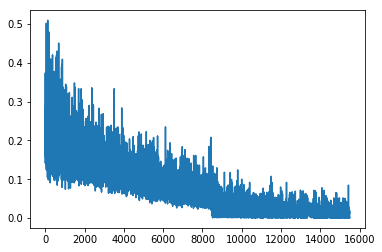

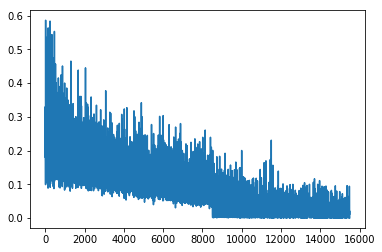

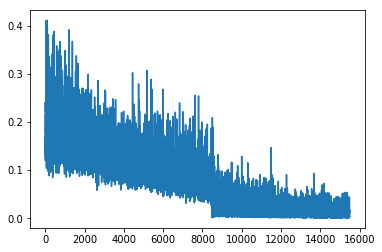

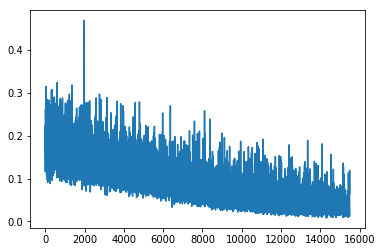

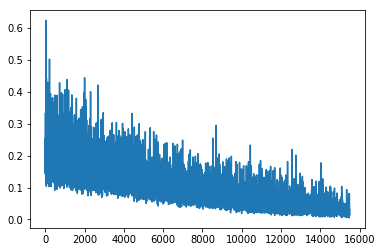

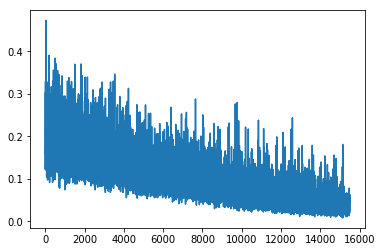

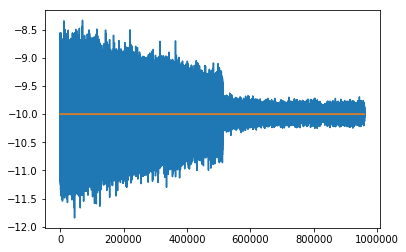

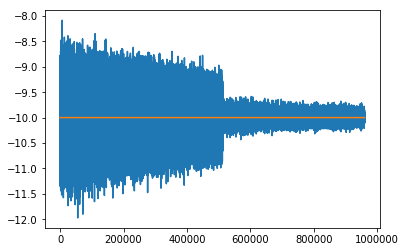

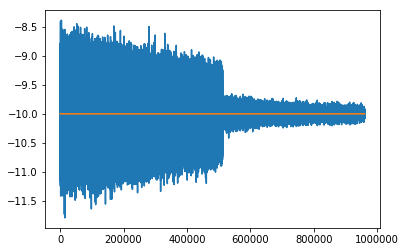

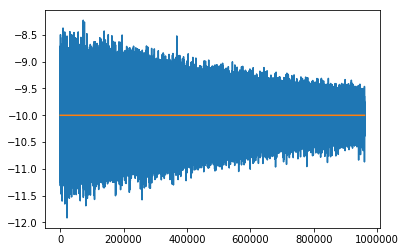

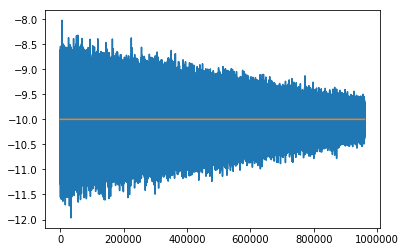

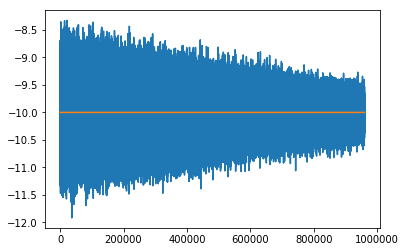

In [10]:
if True:
    for node_indx in range(num_nodes):
        plt.plot(node[node_indx]['mse'][500:-1])
        plt.show()
    
for node_indx in range(num_nodes):
    plt.plot(node[node_indx]['output_list'][63500:-1])
    plt.plot(node[node_indx]['label_list'][63500:-1])
    plt.show()
